In [77]:
#Import notwendiger libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import math

import os 
import warnings
warnings.filterwarnings('ignore')

#import des Panel-Datensatzes 
data_lgd = pd.read_csv('LGD_Panel.csv')

In [78]:
#Bestimmung von Datentypen 
print(data_lgd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [79]:
#Darstellen der Features mit NaN in Trainings- und Testset  
print('columns with null values:\n', data_lgd.isnull().sum())
print('-'*33)


columns with null values:
 id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   61018
balance_time                   0
LTV_time                      25
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time              350
hpi_orig_time                  0
default_time                   0
payoff_time                    0
status_time                    0
lgd_time                   60653
recovery_res               60653
dtype: int64
---------------------------------


In [80]:
#Überblick über wichtige Kennzahlen des Trainings- und Testsets
data_lgd.describe()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
count,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1160.000000,6.217800e+04,62153.000000,62178.000000,62178.000000,...,6.217800e+04,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1525.000000,1.525000e+03
mean,25371.293528,35.877979,20.688218,24.649185,137.722651,40.711207,2.448294e+05,83.320156,6.663767,4.516695,...,2.545839e+05,673.357200,78.702839,5.600969,198.501593,0.024526,0.042218,0.108961,0.495982,1.324083e+05
std,13737.375198,11.652381,7.377185,6.838495,19.016813,9.276421,2.089384e+05,28.106665,2.100772,0.513379,...,2.115463e+05,72.100064,10.243045,2.985547,33.758503,0.154678,0.201087,0.426060,0.381771,1.501463e+05
min,4.000000,1.000000,-40.000000,1.000000,18.000000,7.000000,0.000000e+00,0.000000,0.000000,1.650000,...,0.000000e+00,429.000000,50.100000,0.000000,75.730000,0.000000,0.000000,0.000000,0.000000,-1.909486e+05
25%,13711.250000,28.000000,18.000000,21.000000,137.000000,35.000000,1.008911e+05,67.056456,5.625000,4.240000,...,1.075000e+05,628.000000,75.000000,4.875000,186.910000,0.000000,0.000000,0.000000,0.104600,3.644842e+04
50%,25572.000000,34.000000,22.000000,25.000000,142.000000,40.000000,1.809344e+05,82.256173,6.625000,4.600000,...,1.880000e+05,675.000000,80.000000,6.250000,216.770000,0.000000,0.000000,0.000000,0.514654,8.948393e+04
75%,37326.000000,44.000000,25.000000,28.000000,145.000000,47.000000,3.337000e+05,100.766023,7.820000,4.710000,...,3.500000e+05,730.000000,80.000000,7.388000,223.750000,0.000000,0.000000,0.000000,0.768253,1.832579e+05
max,49972.000000,60.000000,60.000000,60.000000,229.000000,60.000000,3.106990e+06,803.513550,37.500000,8.650000,...,3.107000e+06,819.000000,119.800000,15.000000,226.290000,1.000000,1.000000,2.000000,2.022767,1.518109e+06


In [81]:
#Beschränken des Datensets auf Schuldner, deren Kredit ausgefallen ist
data_lgd = data_lgd[data_lgd['default_time'] == 1]
data_lgd_new = data_lgd.dropna(subset = ['res_time'])
data_lgd_new.head()


,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
263,191,31,23,26,143,38.0,223884.74,87.176730,7.360,4.39,...,630,80.0,7.360,FL,221.91,1,0,1,0.883919,25988.76
356,330,33,27,28,147,43.0,144374.85,98.272701,9.045,4.71,...,613,80.0,9.045,FL,222.39,1,0,1,1.236213,-34103.22
360,331,31,26,28,147,60.0,285484.83,89.452618,10.620,4.64,...,605,80.0,10.620,FL,225.10,1,0,1,0.706870,83684.11
372,343,42,27,32,148,44.0,79140.44,121.463371,8.870,4.71,...,633,90.0,8.870,MD,222.39,1,0,1,1.077359,-6122.26
420,385,39,28,32,88,41.0,150074.42,122.611681,9.820,4.65,...,584,95.0,9.820,TX,219.67,1,0,1,0.351805,97277.45


In [82]:
#Anzahl der null values nach erster Beschränkung des Datensets
print(data_lgd_new.isnull().sum())
print('-'*33)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            5
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
---------------------------------


In [83]:
#Entfernen der NaN in 'state_orig_time'
data_lgd_new = data_lgd_new.dropna(subset = ['state_orig_time'])

print(data_lgd_new.isnull().sum())

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64


In [46]:
#Anzahl der Ausfälle pro Bundesstaat
#count = data_lgd_new['state_orig_time'].value_counts()
#print(count)

In [84]:
#Entwickeln neuer Features
data_lgd_new.loc[:, "res_duration"] = data_lgd_new.loc[:, "res_time"] - data_lgd_new.loc[:, 'time']
data_lgd_new.loc[:, "planned_lifetime"] = data_lgd_new.loc[:, "mat_time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "realized_lifetime"] = data_lgd_new.loc[:, "time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "rel_realized_lifetime"] = data_lgd_new.loc[:, "realized_lifetime"] / data_lgd_new.loc[:, "planned_lifetime"]
data_lgd_new.loc[:, "remaining_lifetime"] = data_lgd_new.loc[:, "planned_lifetime"] - data_lgd_new.loc[:, "realized_lifetime"]
data_lgd_new.loc[:, "diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] - data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "rel_diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] / data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] - data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "rel_diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] / data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] - data_lgd_new.loc[:, "Interest_Rate_orig_time"]
data_lgd_new.loc[:, "rel_diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] / data_lgd_new.loc[:, "Interest_Rate_orig_time"]

data_lgd_new.loc[:, "sq_realized_lifetime"] = data_lgd_new.loc[:, "realized_lifetime"]**2
data_lgd_new.loc[:, "sq_planned_lifetime"] = data_lgd_new.loc[:, "planned_lifetime"]**2
data_lgd_new.loc[:, "sq_remaining_lifetime"] = data_lgd_new.loc[:, "remaining_lifetime"]**2
data_lgd_new.loc[:, "sq_diff_LTV"] = data_lgd_new.loc[:, "diff_LTV"]**2
data_lgd_new.loc[:, "sq_res_duration"] = data_lgd_new.loc[:, "res_duration"]**2
data_lgd_new.loc[:, "sq_interest_rate_time"] = data_lgd_new.loc[:, "interest_rate_time"]**2
data_lgd_new.loc[:, "sq_LTV_time"] = data_lgd_new.loc[:, "LTV_time"]**2
data_lgd_new.loc[:, "sq_LTV_orig_time"] = data_lgd_new.loc[:, "LTV_orig_time"]**2
data_lgd_new.loc[:, "sq_balance_orig_time"] = data_lgd_new.loc[:, "balance_orig_time"]**2
data_lgd_new.loc[:, "sq_FICO_orig_time"] = data_lgd_new.loc[:, "FICO_orig_time"]**2

#data_lgd_new["log_res_duration"] = np.log2(data_lgd_new['res_duration'])





In [85]:
#Berechnung des LGD nach diskontieren der Cashflows
data_lgd_new.loc[:, 'recovery_res'] = data_lgd_new.loc[:, 'recovery_res'].astype(float)
data_lgd_new.loc[:, 'DLGD'] = (data_lgd_new.loc[:, 'balance_time'] - data_lgd_new.loc[:, 'recovery_res'] / (1 + 
            data_lgd_new.loc[:, 'rate_time'] / (100*4)) ** data_lgd_new.loc[:, 'res_duration']) / data_lgd_new.loc[:, 
                                                                                        'balance_time']

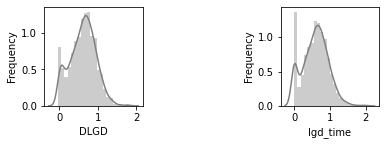

In [86]:
plt.subplot(231)
sns.distplot(data_lgd_new['DLGD'], color='grey')
plt.ylabel('Frequency')

plt.subplot(233)
sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()

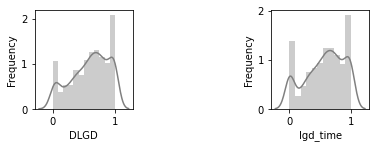

count    1155.00
mean        0.60
std         0.30
min         0.00
25%         0.39
50%         0.64
75%         0.84
max         1.00
Name: DLGD, dtype: float64

In [87]:
#Winsorizen der DLGD und lgd_time um realisationen zwischen 1 und 0 zu erhalten
data_lgd_new.loc[data_lgd_new['DLGD'] >= 1, 'DLGD'] = 1
data_lgd_new.loc[data_lgd_new['DLGD'] <= 0, 'DLGD'] = 0.0001

data_lgd_new.loc[data_lgd_new['lgd_time'] >= 1, 'lgd_time'] = 1
data_lgd_new.loc[data_lgd_new['lgd_time'] <= 0, 'lgd_time'] = 0.0001

plt.subplot(231)
sns.distplot(data_lgd_new['DLGD'], color='grey')
plt.ylabel('Frequency')

plt.subplot(233)
sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()



data_lgd_new.DLGD.describe().round(decimals = 2)


In [88]:
#Korrelation der Features mit dem DLGD
#print(data_lgd_new.corr()['lgd_time'])
print('-'*35)
print(data_lgd_new.corr()['lgd_time'])

-----------------------------------
id                         0.074479
time                       0.158977
orig_time                  0.307813
first_time                 0.292676
mat_time                   0.157705
res_time                   0.304005
balance_time              -0.075964
LTV_time                   0.286003
interest_rate_time         0.127348
rate_time                  0.045475
hpi_time                  -0.105926
gdp_time                  -0.178955
uer_time                   0.096521
REtype_CO_orig_time        0.045123
REtype_PU_orig_time       -0.072172
REtype_SF_orig_time        0.013484
investor_orig_time         0.091249
balance_orig_time         -0.081809
FICO_orig_time             0.050705
LTV_orig_time              0.019000
Interest_Rate_orig_time    0.105016
hpi_orig_time              0.326766
default_time                    NaN
payoff_time                     NaN
status_time                     NaN
lgd_time                   1.000000
recovery_res              -0

In [90]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'id']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rate_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'hpi_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'uer_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_CO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_PU_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_SF_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'default_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'payoff_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'status_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_diff_LTV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_balance_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'state_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_diff_interest_rate']
                                

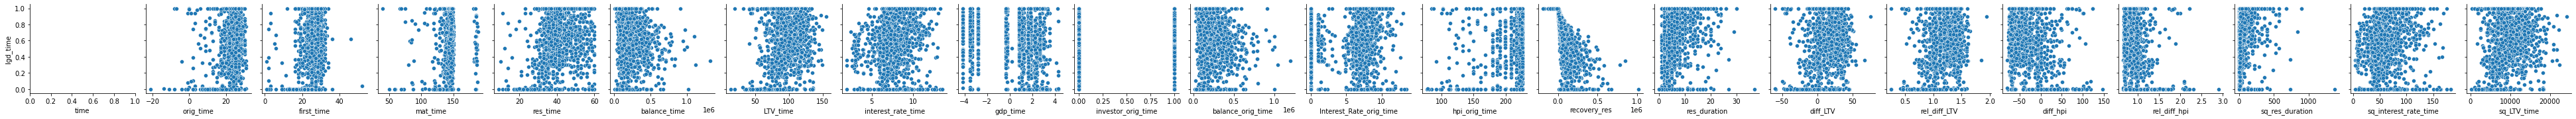

In [108]:
sns.pairplot(data_lgd_new,
            x_vars = ['time', 'orig_time', 'first_time', 'mat_time', 'res_time', 'balance_time', 'LTV_time', 'interest_rate_time', 'gdp_time', 'investor_orig_time', 'balance_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time', 'recovery_res', 'res_duration', 'diff_LTV', 'rel_diff_LTV', 'diff_hpi', 'rel_diff_hpi', 'sq_res_duration', 'sq_interest_rate_time', 'sq_LTV_time'],
            y_vars = ['lgd_time'], 
            )
plt.show()

In [94]:
#Splitten in Trainings- und Testset
lgd_train = data_lgd_new[data_lgd_new['time'] < 45]
lgd_test = data_lgd_new[data_lgd_new['time'] >= 45]

y_train = lgd_train['lgd_time']
x_train = lgd_train.loc[:, lgd_train.columns!="lgd_time"]
x_train = x_train.loc[:, x_train.columns !="DLGD"]

y_test = lgd_test['lgd_time']
x_test = lgd_train.loc[:, lgd_test.columns!="lgd_time"]
x_test = x_test.loc[:, x_test.columns !="DLGD"]

In [95]:
#Importieren des StandardScalers
from sklearn.preprocessing import StandardScaler

#Standardisieren der features
scaler = StandardScaler()

#Nur das Trainingsset fitten
scaler.fit(x_train)

#Transformieren von Trainings- und Testset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [102]:
from sklearn.decomposition import PCA 
#Ausgeben der principle components, sodass 90% der varianz erhalten bleiben 
pca = PCA(.95)

Anzahl benötigter principal Komponents
----------------------------------------
10


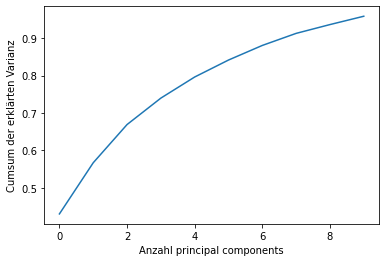

In [103]:
#Fit der PCA auf das Trainingsset
pca.fit(x_train_scaled)

#Plot der kumulativen Summe der erklärten Varianz
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl principal components')
plt.ylabel('Cumsum der erklärten Varianz')

#Anzahl benötigter Komponenten
print('Anzahl benötigter principal Komponents')
print('-'*40)
print(pca.n_components_)

In [105]:
#Transformieren von Trainings- und Testset
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [106]:
#Schaffen der neuen Datensätze 
PCA_train = pd.DataFrame(data=x_train_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10'])
PCA_test = pd.DataFrame(data=x_test_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10'])

In [100]:
PCA_train

,principle_component1,principle_component2,principle_component3,principle_component4,principle_component5,principle_component6,principle_component7,principle_component8
0,0.504276,0.048730,-0.059538,-0.336837,-0.865548,-0.073726,-0.854051,-0.429240
1,-0.564655,-1.872031,-0.207990,0.521275,-0.775299,-0.117564,-0.730224,-0.294207
2,-0.073644,-4.357387,6.259714,2.457980,-1.204457,0.631690,-0.126318,-1.121249
3,-2.154706,-1.709841,-1.872507,0.024645,-0.860128,-0.432770,-1.129939,0.529311
4,-1.262074,-1.570269,-1.882320,1.109084,1.335817,0.830144,-1.833190,2.162799
...,...,...,...,...,...,...,...,...
1040,0.469854,2.826859,0.627117,0.117757,-1.012701,-0.961638,0.501637,0.028176
1041,0.339609,-1.327009,-0.050474,-0.502968,-2.097428,0.036198,2.473048,0.761327
1042,-0.971970,1.596971,-0.048488,1.554051,-0.690728,-1.205743,0.998206,0.808329
1043,-2.152640,-1.703774,3.861678,0.947422,-0.521858,0.640100,-0.591079,-0.027855


In [107]:
PCA_test

,principle_component1,principle_component2,principle_component3,principle_component4,principle_component5,principle_component6,principle_component7,principle_component8,principle_component9,principle_component10
0,0.504276,0.048730,-0.059538,-0.336837,-0.865548,-0.073726,-0.854051,-0.429240,0.266851,-0.006826
1,-0.564655,-1.872031,-0.207990,0.521275,-0.775299,-0.117564,-0.730224,-0.294207,-0.020494,-0.126594
2,-0.073644,-4.357387,6.259714,2.457980,-1.204457,0.631690,-0.126318,-1.121249,-0.100088,-0.002328
3,-2.154706,-1.709841,-1.872507,0.024645,-0.860128,-0.432770,-1.129939,0.529311,-1.228996,1.157158
4,-1.262074,-1.570269,-1.882320,1.109084,1.335817,0.830144,-1.833190,2.162799,1.744494,1.954395
...,...,...,...,...,...,...,...,...,...,...
1040,0.469854,2.826859,0.627117,0.117757,-1.012701,-0.961638,0.501637,0.028176,0.904640,-0.217362
1041,0.339609,-1.327009,-0.050474,-0.502968,-2.097428,0.036198,2.473048,0.761327,0.641535,0.058593
1042,-0.971970,1.596971,-0.048488,1.554051,-0.690728,-1.205743,0.998206,0.808329,0.357833,0.408786
1043,-2.152640,-1.703774,3.861678,0.947422,-0.521858,0.640100,-0.591079,-0.027855,0.037762,0.699876
